In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

import config
import utils
import createData
import getCenter
import filterPoints
import calcCenterDistance
import getNearest
import assignClusters
import adjustCenters

In [2]:
def plotPoints(data, cfg):
    fig = plt.figure(figsize=[9,9])
    ax = plt.axes(projection="3d")
    for x in range(len(data)):
        tmp=data[x]
        m=x%3
        if m==0:
            cluster=1
        elif m==1:
            cluster=2
        else:
            cluster=3
        ax.plot3D(tmp[:, 0],tmp[:, 1], tmp[:, 2], label=cluster)
    plt.legend()

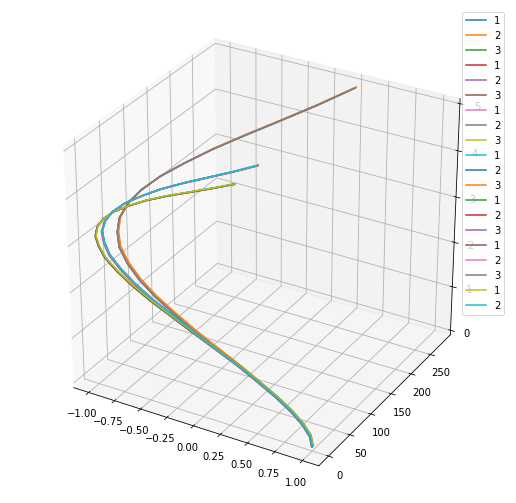

In [3]:
cfg=config.getConfig()
data=createData.create(cfg)
plotPoints(data, cfg)

In [4]:
''' Need to generate initial cluster centers:
    - Get a rough approximation of the center of all points
    - Filter out poor candidates based on distance from that center
    - From the remaining, identify k points as cluster centers'''
center = getCenter.getCenter(data)
startingCenter=np.expand_dims(center, axis=0)
dataMean=np.concatenate([data, startingCenter])
# plotPoints(dataMean, cfg)
filtered=filterPoints.filter(data, center)
# "clusters" holds the index of "data" for each candidate cluster
clusters=[x[0] for x in filtered]
candidates=[data[x] for x in clusters]
# For each candidate cluster, remove it's nearest neighbor
d=getNearest.getNearestNeighbor(candidates, cfg)
# If two points are each others closest neighbor, remove one of them
for x in list(d.keys()):
    a=d[x]
    try:
        if d[a]==x:
            del d[x]
    except:
        pass

In [5]:
# The dictionary now holds candidates for cluster centers
# "d.keys() holds the index to "data" of those points
candidates=list(d.keys())
# The idea here is to find sets of points that are widely separated but not too separated (could be outliers)
# Wide separation should make for good cluster centers
combos=itertools.combinations(candidates, cfg['k'])
distList=[]
for c in combos:
    d=utils.getComboDistance(data, c)
    distList.append((c,d))
distList.sort(key=lambda x: x[1])
# "distList" now has each combo of points plus the distance between them
# Getting the 75th percentile should be big enough without being including outliers
idx=int(len(distList)*.75)
# idx holds the index to the centers we want (ignore the distance)
indexes = distList[idx][0]
clusterCtrs=[]
for x in range(cfg['k']):
    clusterCtrs.append(data[indexes[x]])

##### Starting cluster centers have been generated

In [7]:
# Assign each point to one of the clusters
clusterAssignments=assignClusters.assign(data, clusterCtrs)

In [6]:
#assert(len(data)==len(clusterAssignments)), "each point needs a cluster assignments"
clusterCtrs=adjustCenters.adjust(clusterCtrs, data, clusterAssignments)

cluster 0 improvement: 4.8%
cluster 1 improvement: 5.2%
cluster 2 improvement: 3.4%


In [11]:
clusterA=np.expand_dims(clusterCtrs[0], axis=0)
clusterB=np.expand_dims(clusterCtrs[1], axis=0)
clusterC=np.expand_dims(clusterCtrs[2], axis=0)

tom=np.concatenate([clusterA, clusterB, clusterC], axis=0)
tom.shape

(3, 25, 3)

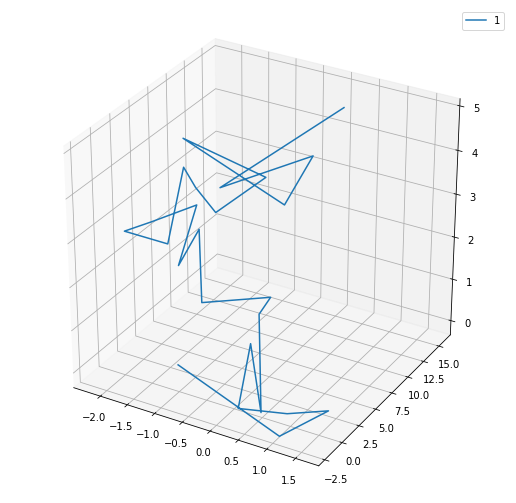

In [12]:
plotPoints(clusterA, cfg)

In [ ]:
utils.getDistance(center, clusterA)

In [9]:
np.random.normal(loc=0.0, scale=0.05, size=10)

array([ 0.02530324,  0.00458997, -0.03005237,  0.02434849, -0.07273593,
       -0.08878737, -0.0072089 , -0.0551196 , -0.02413892, -0.04631335])

In [10]:
data[0]

array([[ 1.  ,  0.97,  0.  ],
       [ 0.98,  1.18,  0.21],
       [ 0.91,  1.39,  0.42],
       [ 0.81,  1.6 ,  0.62],
       [ 0.67,  1.81,  0.83],
       [ 0.5 ,  2.01,  1.04],
       [ 0.32,  2.22,  1.25],
       [ 0.11,  2.43,  1.46],
       [-0.1 ,  2.64,  1.67],
       [-0.3 ,  2.85,  1.88],
       [-0.49,  3.06,  2.08],
       [-0.66,  3.26,  2.29],
       [-0.8 ,  3.47,  2.5 ],
       [-0.91,  3.68,  2.71],
       [-0.97,  3.89,  2.92],
       [-1.  ,  4.1 ,  3.12],
       [-0.98,  4.31,  3.33],
       [-0.92,  4.51,  3.54],
       [-0.82,  4.72,  3.75],
       [-0.68,  4.93,  3.96],
       [-0.52,  5.14,  4.17],
       [-0.33,  5.35,  4.38],
       [-0.13,  5.56,  4.58],
       [ 0.08,  5.76,  4.79],
       [ 0.28,  5.97,  5.  ]])

In [ ]:
clusterCenters=getCenterMeans(clusterAssignments, data)

In [ ]:
count=0
totalDist=0
for idx in range(len(data)):
    if clusterAssignments[idx]=="A":
        count+=1
        ctr=clusterCtrC
        totalDist+=utils.getDistance(ctr, data[idx])
print("Average: ", totalDist/count)

In [ ]:
ctr=np.expand_dims(bestCtr, axis=0)
dataMean=np.concatenate([dataMean, ctr])

plotCountries(dataMean, cfg)

In [ ]:
'''# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)'''

In [ ]:
clusterCtrs[0].shape